# Linear Regression - Ⅰ

In [39]:
import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt

## [1] Data
-X , Y 좌표 데이터를 가지고 Linear regression 모델을 만들어 본다

In [40]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.1], [6.3], [4.8], 
                    [9.7], [6.2], [7.9], [2.7], [7.2], 
                    [10.1], [5.3], [7.7], [3.1]])

y_train = np.array([[1.7], [1.9], [2.09], [2.1], [1.9], [1.3], 
                    [3.3], [2.5], [2.5], [1.1], [2.7], 
                    [3.4], [1.5], [2.4], [1.3]])

#텐서화
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train)

print(type(x_train_tensor))

<class 'torch.Tensor'>


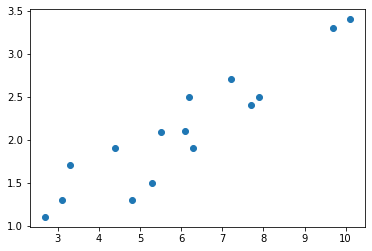

In [41]:
# 그래프 그리기
plt.figure()
plt.scatter(x_train, y_train)

## [2] Model

$$ Wnew = Wold - \alpha \nabla W $$

$$ H(x) = Wx + b $$

In [64]:
# Hyper parameters
input_size = 1
output_size = 1
num_epochs = 50
learning_rate = 0.01

In [65]:
# Linear Regression Model
model = torch.nn.Linear(input_size, output_size)

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [73]:
# Loss function, Optimizer 정의
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

## [3] Training

In [74]:
# Train the model

for epoch in range(num_epochs):
    #모델링
    optimizer.zero_grad()
    
    outputs = model(x_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    # 학습
    loss.backward()
    optimizer.step()

    # Loss 확인하기
    if (epoch+1) % 2 == 0:
        print (f'Epoch : {epoch+1} , Loss: {loss.item():.2f}')

Epoch : 2 , Loss: 0.11
Epoch : 4 , Loss: 0.11
Epoch : 6 , Loss: 0.11
Epoch : 8 , Loss: 0.11
Epoch : 10 , Loss: 0.10
Epoch : 12 , Loss: 0.10
Epoch : 14 , Loss: 0.10
Epoch : 16 , Loss: 0.10
Epoch : 18 , Loss: 0.10
Epoch : 20 , Loss: 0.10
Epoch : 22 , Loss: 0.10
Epoch : 24 , Loss: 0.10
Epoch : 26 , Loss: 0.10
Epoch : 28 , Loss: 0.10
Epoch : 30 , Loss: 0.10
Epoch : 32 , Loss: 0.10
Epoch : 34 , Loss: 0.10
Epoch : 36 , Loss: 0.10
Epoch : 38 , Loss: 0.10
Epoch : 40 , Loss: 0.10
Epoch : 42 , Loss: 0.10
Epoch : 44 , Loss: 0.10
Epoch : 46 , Loss: 0.10
Epoch : 48 , Loss: 0.10
Epoch : 50 , Loss: 0.10


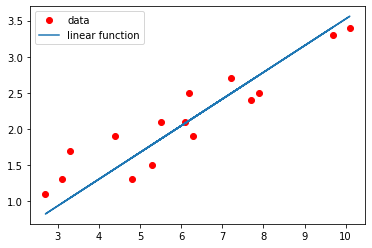

In [75]:
x_train_plot= torch.FloatTensor(x_train)
predicted = model(x_train_plot).detach().numpy()  # torch.detach().numpy()-->numpy를 텐서로 바꿔줌

plt.figure()
plt.plot(x_train, y_train, 'ro', label='data') # 'ro' --> 빨간색, o 동그라미(circle)를 의미
plt.plot(x_train, predicted, label='linear function')
plt.legend(loc='upper left') # 범례 위치 설정
plt.show()

### Check

In [76]:
model.state_dict()

OrderedDict([('weight', tensor([[0.3699]])), ('bias', tensor([-0.1758]))])

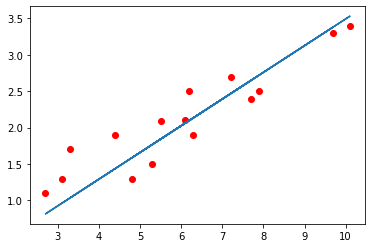

In [79]:
check_y = 0.3669*x_train-0.1758

plt.figure()
plt.plot(x_train, y_train, 'ro', label='data')
plt.plot(x_train, check_y)
plt.show()